In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('hotel_bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015


Data cleaning

In [3]:
#to check the shape of the data
df.shape


(119390, 32)

In [4]:
#to check the info about the data like null values ,data types
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [6]:
#handling Null values
def data_cleaning(df):
    df.fillna(0,inplace=True)#zero imputation
    print(df.isna().sum())
data_cleaning(df)

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [7]:

df['reservation_status_date']=pd.to_datetime(df['reservation_status_date'])

In [8]:
#to check the unique values from adults,chiltren,babies column
list_cols=["adults","children","babies"]
for i in list_cols:
    print(f"{i} has unique value as {df[i].unique()}")

adults has unique value as [ 2  1  3  4 40 26 50 27 55  0 20  6  5 10]
children has unique value as [ 0.  1.  2. 10.  3.]
babies has unique value as [ 0  1  2 10  9]


In [9]:
Filtered_data=(df['adults']==0) & (df['children']==0) & (df['babies']==0)
Final_data=df[~Filtered_data]

In [10]:
Final_data.shape

(119210, 32)

In [11]:
country_wise_data=Final_data[Final_data['is_canceled']==0]['country'].value_counts().reset_index()
country_wise_data.columns=['Country','No Of Guests']
print(country_wise_data)

    Country  No Of Guests
0       PRT         20977
1       GBR          9668
2       FRA          8468
3       ESP          6383
4       DEU          6067
..      ...           ...
161     KIR             1
162     ATF             1
163     TJK             1
164     SLE             1
165     FRO             1

[166 rows x 2 columns]


In [12]:
import plotly.io as pio
pio.renderers.default = 'notebook_connected'  # or 'notebook_connected'

In [13]:
import plotly.express as px
map_guests=px.choropleth(country_wise_data,locations=country_wise_data['Country'],
                         color=country_wise_data['No Of Guests'],
                         hover_name=country_wise_data['Country'],
                         title='Home Country Of Guests')

#map_guests.show()

In [14]:
Final_data['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [15]:
Final_data['adr']

0           0.00
1           0.00
2          75.00
3          75.00
4          98.00
           ...  
119385     96.14
119386    225.43
119387    157.71
119388    104.40
119389    151.20
Name: adr, Length: 119210, dtype: float64

In [16]:
data=Final_data[Final_data['is_canceled']==0]

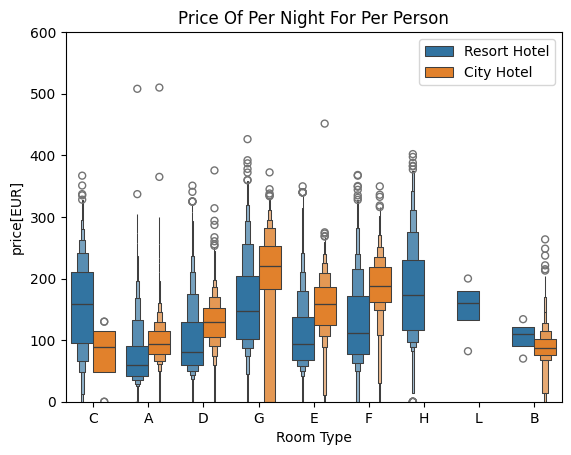

In [17]:
#boxplot
plt.Figure(figsize=(12,8))
sns.boxenplot(x='reserved_room_type',
              y='adr',
              hue='hotel',data=data)
plt.title('Price Of Per Night For Per Person')
plt.xlabel('Room Type')
plt.ylabel('price[EUR]')
plt.legend(loc='upper right')
plt.ylim(0,600)
plt.show()

In [18]:
Final_data['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [19]:
Data_resort=Final_data[(Final_data['hotel']=='Resort Hotel') & (Final_data['is_canceled']==0)]
Data_city=Final_data[(Final_data['hotel']=='City Hotel') & (Final_data['is_canceled']==0)]


In [20]:
Resort_hotel=Data_resort.groupby(['arrival_date_month'])['adr'].mean().reset_index()

In [21]:
city_hotel=Data_city.groupby(['arrival_date_month'])['adr'].mean().reset_index()
city_hotel

,arrival_date_month,adr
0,April,111.962267
1,August,118.674598
2,December,88.401855
3,February,86.520062
4,January,82.330983
5,July,115.818019
6,June,117.874360
7,March,90.658533
8,May,120.669827
9,November,86.946592


In [22]:
final=Resort_hotel.merge(city_hotel,on='arrival_date_month')
final.columns=['Month','Resort_hotel_price','City_hotel_price']
final

,Month,Resort_hotel_price,City_hotel_price
0,April,75.867816,111.962267
1,August,181.205892,118.674598
2,December,68.410104,88.401855
3,February,54.147478,86.520062
4,January,48.761125,82.330983
5,July,150.122528,115.818019
6,June,107.974850,117.874360
7,March,57.056838,90.658533
8,May,76.657558,120.669827
9,November,48.706289,86.946592


In [23]:
from calendar import month_name
for i,name in enumerate(month_name):
    print(i,name)

0 
1 January
2 February
3 March
4 April
5 May
6 June
7 July
8 August
9 September
10 October
11 November
12 December


In [24]:
from calendar import month_name

def sort_month(df,colname):
    month_dict={j:i for i,j in enumerate(month_name)}
    df['month_num']=df[colname].apply(lambda x:month_dict[x])
    return df.sort_values(by='month_num').reset_index().drop(['index','month_num'],axis=1)

In [25]:
sort_month(final,'Month')

,Month,Resort_hotel_price,City_hotel_price
0,January,48.761125,82.330983
1,February,54.147478,86.520062
2,March,57.056838,90.658533
3,April,75.867816,111.962267
4,May,76.657558,120.669827
5,June,107.974850,117.874360
6,July,150.122528,115.818019
7,August,181.205892,118.674598
8,September,96.416860,112.776582
9,October,61.775449,102.004672


<Axes: xlabel='Month'>

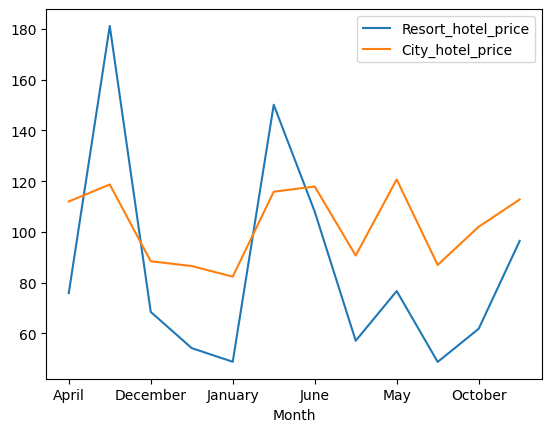

In [26]:
final.plot(kind='line',x='Month',y=['Resort_hotel_price','City_hotel_price'])

In [27]:
Rush_resort=Data_resort['arrival_date_month'].value_counts().reset_index()
Rush_resort.columns=['Month','No of guests in Resort']
Rush_resort



,Month,No of guests in Resort
0,August,3257
1,July,3137
2,October,2575
3,March,2571
4,April,2550
5,May,2535
6,February,2308
7,September,2102
8,June,2037
9,December,2014


In [28]:
Rush_city=Data_city['arrival_date_month'].value_counts().reset_index()
Rush_city.columns=['Month','No of guests in City']
Rush_city

,Month,No of guests in City
0,August,5367
1,July,4770
2,May,4568
3,June,4358
4,October,4326
5,September,4283
6,March,4049
7,April,4010
8,February,3051
9,November,2676


In [29]:
final_rush=Rush_resort.merge(Rush_city,on='Month')
final_rush

,Month,No of guests in Resort,No of guests in City
0,August,3257,5367
1,July,3137,4770
2,October,2575,4326
3,March,2571,4049
4,April,2550,4010
5,May,2535,4568
6,February,2308,3051
7,September,2102,4283
8,June,2037,4358
9,December,2014,2377


In [30]:
sort_month(final_rush,'Month')

,Month,No of guests in Resort,No of guests in City
0,January,1866,2249
1,February,2308,3051
2,March,2571,4049
3,April,2550,4010
4,May,2535,4568
5,June,2037,4358
6,July,3137,4770
7,August,3257,5367
8,September,2102,4283
9,October,2575,4326


<Axes: xlabel='Month'>

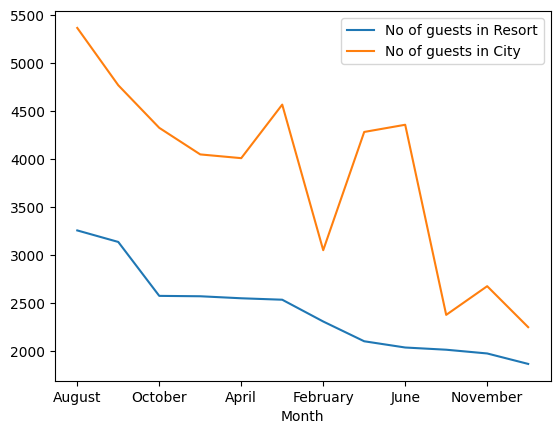

In [31]:
final_rush.plot(kind='line',x='Month',
                y=['No of guests in Resort','No of guests in City'])

In [32]:
filter_condition=Final_data['is_canceled']==0
clean_data=Final_data[filter_condition]
clean_data.head()


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [33]:
clean_data['Total_nights']=clean_data['stays_in_weekend_nights']+clean_data['stays_in_week_nights']
clean_data.head()

C:\Users\HP\AppData\Local\Temp\ipykernel_16092\574231007.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,Total_nights
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,304.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,240.0,0.0,0,Transient,98.0,0,1,Check-Out,2015-07-03,2


In [34]:
stay=clean_data.groupby(['Total_nights','hotel']).agg('count').reset_index()
stay=stay.iloc[:,0:3]
stay=stay.rename(columns={'is_canceled':'No Of Stays'})
stay

,Total_nights,hotel,No Of Stays
0,0,City Hotel,251
1,0,Resort Hotel,371
2,1,City Hotel,9155
3,1,Resort Hotel,6579
4,2,City Hotel,10983
...,...,...,...
57,46,Resort Hotel,1
58,48,City Hotel,1
59,56,Resort Hotel,1
60,60,Resort Hotel,1


<Axes: xlabel='Total_nights', ylabel='No Of Stays'>

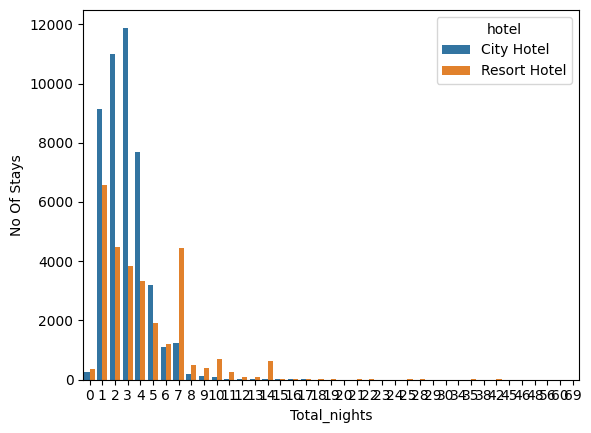

In [35]:
#barplot
sns.barplot(x='Total_nights',y='No Of Stays',hue='hotel',hue_order=['City Hotel','Resort Hotel'],data=stay)

In [36]:
df_numeric=Final_data.select_dtypes(include=['number'])
correlation_matrix=df_numeric.corr()
correlation_matrix

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
is_canceled,1.000000,0.292876,0.016622,0.008315,-0.005948,-0.001323,0.025542,0.058182,0.004851,-0.032569,-0.083745,0.110139,-0.057365,-0.144832,-0.046770,-0.083594,0.054301,0.046492,-0.195701,-0.234877
lead_time,0.292876,1.000000,0.040334,0.127046,0.002306,0.085985,0.166892,0.117575,-0.037878,-0.021003,-0.123209,0.086025,-0.073599,0.002230,-0.013114,-0.085854,0.170008,-0.065018,-0.116624,-0.095949
arrival_date_year,0.016622,0.040334,1.000000,-0.540373,-0.000121,0.021694,0.031203,0.030266,0.054710,-0.013192,0.010281,-0.119905,0.029234,0.031416,0.056438,0.033682,-0.056348,0.198429,-0.013812,0.108610
arrival_date_week_number,0.008315,0.127046,-0.540373,1.000000,0.066572,0.018629,0.016047,0.026567,0.005556,0.010417,-0.031125,0.035493,-0.021009,0.006311,-0.018225,-0.032912,0.022677,0.076281,0.001980,0.026202
arrival_date_day_of_month,-0.005948,0.002306,-0.000121,0.066572,1.000000,-0.016225,-0.028362,-0.001754,0.014550,-0.000235,-0.006471,-0.027027,-0.000306,0.011266,0.000159,0.003667,0.022532,0.030291,0.008569,0.003026
stays_in_weekend_nights,-0.001323,0.085985,0.021694,0.018629,-0.016225,1.000000,0.494175,0.094759,0.046135,0.018607,-0.086009,-0.012769,-0.042859,0.050191,0.162411,-0.080783,-0.054399,0.050670,-0.018520,0.073124
stays_in_week_nights,0.025542,0.166892,0.031203,0.016047,-0.028362,0.494175,1.000000,0.096214,0.044652,0.020373,-0.095302,-0.013976,-0.048873,0.080018,0.196777,-0.044437,-0.002026,0.066847,-0.024933,0.068738
adults,0.058182,0.117575,0.030266,0.026567,-0.001754,0.094759,0.096214,1.000000,0.029409,0.017890,-0.140973,-0.007070,-0.108856,-0.041472,0.023370,-0.166182,-0.008365,0.224253,0.014438,0.123353
children,0.004851,-0.037878,0.054710,0.005556,0.014550,0.046135,0.044652,0.029409,1.000000,0.023999,-0.032475,-0.024755,-0.021078,0.051000,0.050461,-0.042554,-0.033293,0.325057,0.056247,0.081747
babies,-0.032569,-0.021003,-0.013192,0.010417,-0.000235,0.018607,0.020373,0.017890,0.023999,1.000000,-0.008813,-0.007509,-0.006552,0.085605,0.030235,-0.009426,-0.010627,0.029043,0.037389,0.097939


In [37]:
correlation_matrix=correlation_matrix['is_canceled'][1:]
correlation_matrix

lead_time                         0.292876
arrival_date_year                 0.016622
arrival_date_week_number          0.008315
arrival_date_day_of_month        -0.005948
stays_in_weekend_nights          -0.001323
stays_in_week_nights              0.025542
adults                            0.058182
children                          0.004851
babies                           -0.032569
is_repeated_guest                -0.083745
previous_cancellations            0.110139
previous_bookings_not_canceled   -0.057365
booking_changes                  -0.144832
agent                            -0.046770
company                          -0.083594
days_in_waiting_list              0.054301
adr                               0.046492
required_car_parking_spaces      -0.195701
total_of_special_requests        -0.234877
Name: is_canceled, dtype: float64

In [38]:
correlation_matrix.abs().sort_values(ascending=False)

lead_time                         0.292876
total_of_special_requests         0.234877
required_car_parking_spaces       0.195701
booking_changes                   0.144832
previous_cancellations            0.110139
is_repeated_guest                 0.083745
company                           0.083594
adults                            0.058182
previous_bookings_not_canceled    0.057365
days_in_waiting_list              0.054301
agent                             0.046770
adr                               0.046492
babies                            0.032569
stays_in_week_nights              0.025542
arrival_date_year                 0.016622
arrival_date_week_number          0.008315
arrival_date_day_of_month         0.005948
children                          0.004851
stays_in_weekend_nights           0.001323
Name: is_canceled, dtype: float64

In [39]:
numerical_features_not_imp=['arrival_date_week_number','arrival_date_day_of_month','children','stays_in_weekend_nights']

In [40]:
#numerical columns
numerical_features=[col for col in Final_data.columns if Final_data[col].dtype !='O' and col not in numerical_features_not_imp]
numerical_features

['is_canceled',
 'lead_time',
 'arrival_date_year',
 'stays_in_week_nights',
 'adults',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'agent',
 'company',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'reservation_status_date']

In [42]:
categorical_features_not_imp=['country','reservation_status','assigned_room_type']

In [43]:
#object columns
categorical_features=[col for col in Final_data.columns if Final_data[col].dtype =='O' and col not in categorical_features_not_imp]
categorical_features

['hotel',
 'arrival_date_month',
 'meal',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'deposit_type',
 'customer_type']

In [44]:
Final_data[categorical_features]

,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type
0,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient
1,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient
2,Resort Hotel,July,BB,Direct,Direct,A,No Deposit,Transient
3,Resort Hotel,July,BB,Corporate,Corporate,A,No Deposit,Transient
4,Resort Hotel,July,BB,Online TA,TA/TO,A,No Deposit,Transient
...,...,...,...,...,...,...,...,...
119385,City Hotel,August,BB,Offline TA/TO,TA/TO,A,No Deposit,Transient
119386,City Hotel,August,BB,Online TA,TA/TO,E,No Deposit,Transient
119387,City Hotel,August,BB,Online TA,TA/TO,D,No Deposit,Transient
119388,City Hotel,August,BB,Online TA,TA/TO,A,No Deposit,Transient


In [45]:
data_numerical=Final_data[numerical_features]
data_numerical

,is_canceled,lead_time,arrival_date_year,stays_in_week_nights,adults,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
0,0,342,2015,0,2,0,0,0,0,3,0.0,0.0,0,0.00,0,0,2015-07-01
1,0,737,2015,0,2,0,0,0,0,4,0.0,0.0,0,0.00,0,0,2015-07-01
2,0,7,2015,1,1,0,0,0,0,0,0.0,0.0,0,75.00,0,0,2015-07-02
3,0,13,2015,1,1,0,0,0,0,0,304.0,0.0,0,75.00,0,0,2015-07-02
4,0,14,2015,2,2,0,0,0,0,0,240.0,0.0,0,98.00,0,1,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,23,2017,5,2,0,0,0,0,0,394.0,0.0,0,96.14,0,0,2017-09-06
119386,0,102,2017,5,3,0,0,0,0,0,9.0,0.0,0,225.43,0,2,2017-09-07
119387,0,34,2017,5,2,0,0,0,0,0,9.0,0.0,0,157.71,0,4,2017-09-07
119388,0,109,2017,5,2,0,0,0,0,0,89.0,0.0,0,104.40,0,0,2017-09-07


In [46]:
data_numerical['year']=data_numerical['reservation_status_date'].dt.year
data_numerical['month']=data_numerical['reservation_status_date'].dt.month
data_numerical['day']=data_numerical['reservation_status_date'].dt.day

C:\Users\HP\AppData\Local\Temp\ipykernel_16092\3134185104.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\HP\AppData\Local\Temp\ipykernel_16092\3134185104.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\HP\AppData\Local\Temp\ipykernel_16092\3134185104.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

In [47]:
data_numerical.head()

,is_canceled,lead_time,arrival_date_year,stays_in_week_nights,adults,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,year,month,day
0,0,342,2015,0,2,0,0,0,0,3,0.0,0.0,0,0.0,0,0,2015-07-01,2015,7,1
1,0,737,2015,0,2,0,0,0,0,4,0.0,0.0,0,0.0,0,0,2015-07-01,2015,7,1
2,0,7,2015,1,1,0,0,0,0,0,0.0,0.0,0,75.0,0,0,2015-07-02,2015,7,2
3,0,13,2015,1,1,0,0,0,0,0,304.0,0.0,0,75.0,0,0,2015-07-02,2015,7,2
4,0,14,2015,2,2,0,0,0,0,0,240.0,0.0,0,98.0,0,1,2015-07-03,2015,7,3


In [48]:
data_numerical.drop('reservation_status_date',axis=1,inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_16092\1778720357.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Feature Encoding

Mean Encoding

In [49]:
data_categorical=Final_data[categorical_features]
data_categorical

,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type
0,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient
1,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient
2,Resort Hotel,July,BB,Direct,Direct,A,No Deposit,Transient
3,Resort Hotel,July,BB,Corporate,Corporate,A,No Deposit,Transient
4,Resort Hotel,July,BB,Online TA,TA/TO,A,No Deposit,Transient
...,...,...,...,...,...,...,...,...
119385,City Hotel,August,BB,Offline TA/TO,TA/TO,A,No Deposit,Transient
119386,City Hotel,August,BB,Online TA,TA/TO,E,No Deposit,Transient
119387,City Hotel,August,BB,Online TA,TA/TO,D,No Deposit,Transient
119388,City Hotel,August,BB,Online TA,TA/TO,A,No Deposit,Transient


In [50]:
data_categorical.columns

Index(['hotel', 'arrival_date_month', 'meal', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'deposit_type',
       'customer_type'],
      dtype='object')

In [51]:
data_categorical['cancellation']=Final_data['is_canceled']
data_categorical

C:\Users\HP\AppData\Local\Temp\ipykernel_16092\3320673045.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,cancellation
0,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient,0
1,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient,0
2,Resort Hotel,July,BB,Direct,Direct,A,No Deposit,Transient,0
3,Resort Hotel,July,BB,Corporate,Corporate,A,No Deposit,Transient,0
4,Resort Hotel,July,BB,Online TA,TA/TO,A,No Deposit,Transient,0
...,...,...,...,...,...,...,...,...,...
119385,City Hotel,August,BB,Offline TA/TO,TA/TO,A,No Deposit,Transient,0
119386,City Hotel,August,BB,Online TA,TA/TO,E,No Deposit,Transient,0
119387,City Hotel,August,BB,Online TA,TA/TO,D,No Deposit,Transient,0
119388,City Hotel,August,BB,Online TA,TA/TO,A,No Deposit,Transient,0


In [52]:
#mean Encoding
def mean_encoder(df,col,mean_col):
    df_dict=df.groupby([col])[mean_col].mean().to_dict()
    df[col]=df[col].map(df_dict)
    return df
for col in data_categorical.columns:
    data_categorical=mean_encoder(data_categorical,col,'cancellation')

C:\Users\HP\AppData\Local\Temp\ipykernel_16092\1970889636.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\HP\AppData\Local\Temp\ipykernel_16092\1970889636.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\HP\AppData\Local\Temp\ipykernel_16092\1970889636.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

In [53]:
data_categorical

,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,cancellation
0,0.277674,0.374644,0.374106,0.153712,0.174868,0.330827,0.28402,0.407864,0.0
1,0.277674,0.374644,0.374106,0.153712,0.174868,0.330827,0.28402,0.407864,0.0
2,0.277674,0.374644,0.374106,0.153712,0.174868,0.391567,0.28402,0.407864,0.0
3,0.277674,0.374644,0.374106,0.187618,0.220568,0.391567,0.28402,0.407864,0.0
4,0.277674,0.374644,0.374106,0.367590,0.410598,0.391567,0.28402,0.407864,0.0
...,...,...,...,...,...,...,...,...,...
119385,0.417859,0.377823,0.374106,0.343313,0.410598,0.391567,0.28402,0.407864,0.0
119386,0.417859,0.377823,0.374106,0.367590,0.410598,0.292683,0.28402,0.407864,0.0
119387,0.417859,0.377823,0.374106,0.367590,0.410598,0.318108,0.28402,0.407864,0.0
119388,0.417859,0.377823,0.374106,0.367590,0.410598,0.391567,0.28402,0.407864,0.0


In [54]:
data_categorical.drop(['cancellation'],axis=1,inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_16092\2483735816.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



data processing

In [55]:
Final_df=pd.concat([data_numerical,data_categorical],axis=1)

In [56]:
Final_df.head()

,is_canceled,lead_time,arrival_date_year,stays_in_week_nights,adults,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,...,month,day,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type
0,0,342,2015,0,2,0,0,0,0,3,...,7,1,0.277674,0.374644,0.374106,0.153712,0.174868,0.330827,0.28402,0.407864
1,0,737,2015,0,2,0,0,0,0,4,...,7,1,0.277674,0.374644,0.374106,0.153712,0.174868,0.330827,0.28402,0.407864
2,0,7,2015,1,1,0,0,0,0,0,...,7,2,0.277674,0.374644,0.374106,0.153712,0.174868,0.391567,0.28402,0.407864
3,0,13,2015,1,1,0,0,0,0,0,...,7,2,0.277674,0.374644,0.374106,0.187618,0.220568,0.391567,0.28402,0.407864
4,0,14,2015,2,2,0,0,0,0,0,...,7,3,0.277674,0.374644,0.374106,0.367590,0.410598,0.391567,0.28402,0.407864


Handling Outliers

In [57]:
Final_df.describe()

,is_canceled,lead_time,arrival_date_year,stays_in_week_nights,adults,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,...,month,day,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type
count,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,...,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000
mean,0.370766,104.109227,2016.156472,2.499195,1.859206,0.007961,0.031499,0.087191,0.137094,0.218799,...,6.333630,15.666278,0.370766,0.370766,0.370766,0.370766,0.370766,0.370766,0.370766,0.370766
std,0.483012,106.875450,0.707485,1.897106,0.575186,0.097509,0.174663,0.844918,1.498137,0.638504,...,3.345818,8.778871,0.066212,0.033756,0.024433,0.128967,0.085574,0.035148,0.232585,0.065988
min,0.000000,0.000000,2015.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.277674,0.305016,0.244654,0.122253,0.174868,0.292683,0.222222,0.101045
25%,0.000000,18.000000,2016.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.000000,8.000000,0.277674,0.334451,0.374106,0.343313,0.410598,0.330827,0.284020,0.407864
50%,0.000000,69.000000,2016.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,6.000000,16.000000,0.417859,0.377823,0.374106,0.367590,0.410598,0.391567,0.284020,0.407864
75%,1.000000,161.000000,2017.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,9.000000,23.000000,0.417859,0.397029,0.374106,0.367590,0.410598,0.391567,0.284020,0.407864
max,1.000000,737.000000,2017.000000,50.000000,55.000000,10.000000,1.000000,26.000000,72.000000,18.000000,...,12.000000,31.000000,0.417859,0.414860,0.598997,1.000000,0.800000,0.407654,0.993624,0.407864


C:\Users\HP\AppData\Local\Temp\ipykernel_16092\1264399249.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='lead_time', ylabel='Density'>

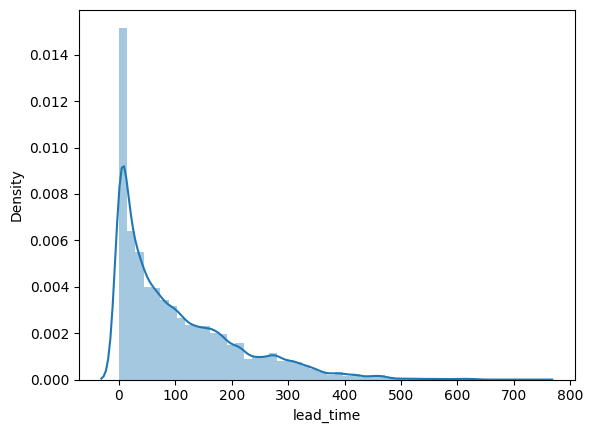

In [58]:
#seaborn library
sns.distplot(Final_df['lead_time'])

In [59]:
def handle_outliers(col):
    Final_df[col]=np.log1p(Final_df[col])

In [60]:
handle_outliers('lead_time')

C:\Users\HP\AppData\Local\Temp\ipykernel_16092\2028628702.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='lead_time', ylabel='Density'>

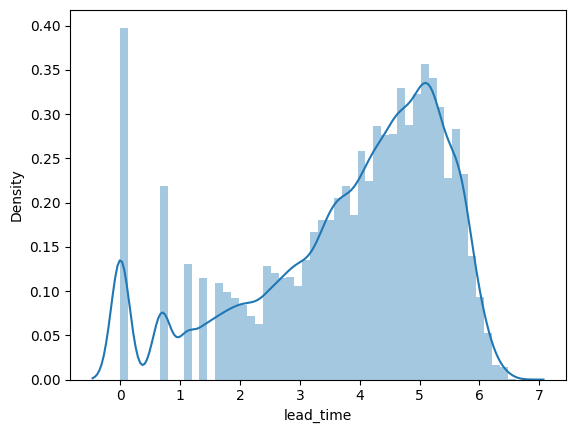

In [62]:
sns.distplot(Final_df['lead_time'].dropna())

In [65]:
Final_df['adr'].describe()

count    119210.000000
mean        101.969092
std          50.434007
min          -6.380000
25%          69.500000
50%          94.950000
75%         126.000000
max        5400.000000
Name: adr, dtype: float64

C:\Users\HP\AppData\Local\Temp\ipykernel_16092\1114388041.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='adr', ylabel='Density'>

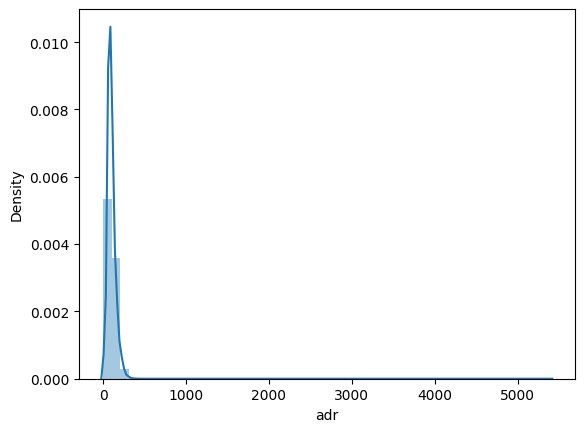

In [ ]:
sns.distplot(Final_df['adr'])

In [66]:
handle_outliers('adr')

c:\Users\HP\Desktop\data\env\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning:

invalid value encountered in log1p



C:\Users\HP\AppData\Local\Temp\ipykernel_16092\1114388041.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='adr', ylabel='Density'>

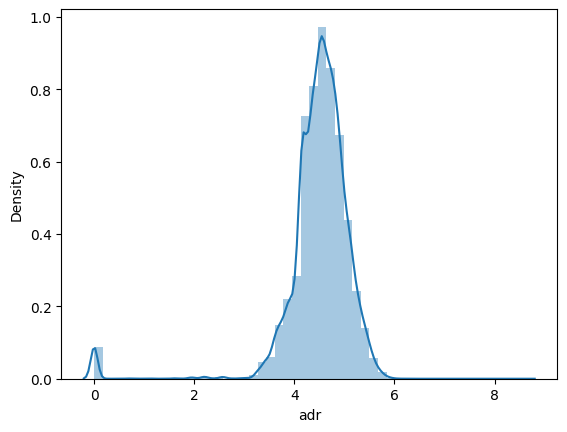

In [67]:
sns.distplot(Final_df['adr'])

In [72]:
Final_df.isna().sum()

is_canceled                       0
lead_time                         0
arrival_date_year                 0
stays_in_week_nights              0
adults                            0
babies                            0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
agent                             0
company                           0
days_in_waiting_list              0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
year                              0
month                             0
day                               0
hotel                             0
arrival_date_month                0
meal                              0
market_segment                    0
distribution_channel              0
reserved_room_type                0
deposit_type                      0
customer_type                     0
dtype: int64

In [71]:
Final_df.dropna(inplace=True)

Feature Importance

In [ ]:
#separate depenant and indepentent variable
x=Final_df.drop(['is_canceled'],axis=1)#independent variable
y=Final_df['is_canceled']#dependent variable

In [75]:
x.head()

,lead_time,arrival_date_year,stays_in_week_nights,adults,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,...,month,day,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type
0,5.837730,2015,0,2,0,0,0,0,3,0.0,...,7,1,0.277674,0.374644,0.374106,0.153712,0.174868,0.330827,0.28402,0.407864
1,6.603944,2015,0,2,0,0,0,0,4,0.0,...,7,1,0.277674,0.374644,0.374106,0.153712,0.174868,0.330827,0.28402,0.407864
2,2.079442,2015,1,1,0,0,0,0,0,0.0,...,7,2,0.277674,0.374644,0.374106,0.153712,0.174868,0.391567,0.28402,0.407864
3,2.639057,2015,1,1,0,0,0,0,0,304.0,...,7,2,0.277674,0.374644,0.374106,0.187618,0.220568,0.391567,0.28402,0.407864
4,2.708050,2015,2,2,0,0,0,0,0,240.0,...,7,3,0.277674,0.374644,0.374106,0.367590,0.410598,0.391567,0.28402,0.407864


In [76]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: is_canceled, dtype: int64

In [78]:
x.columns

Index(['lead_time', 'arrival_date_year', 'stays_in_week_nights', 'adults',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'year', 'month', 'day', 'hotel',
       'arrival_date_month', 'meal', 'market_segment', 'distribution_channel',
       'reserved_room_type', 'deposit_type', 'customer_type'],
      dtype='object')

In [79]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [80]:
feature_selection=SelectFromModel(Lasso(alpha=0.005,random_state=0))

In [81]:
feature_selection.fit(x,y)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [82]:
feature_selection.get_support()

array([ True,  True, False,  True, False, False,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False, False, False, False, False,  True, False])

In [84]:
columns=x.columns
columns

Index(['lead_time', 'arrival_date_year', 'stays_in_week_nights', 'adults',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'year', 'month', 'day', 'hotel',
       'arrival_date_month', 'meal', 'market_segment', 'distribution_channel',
       'reserved_room_type', 'deposit_type', 'customer_type'],
      dtype='object')

In [85]:
selected_features=columns[(feature_selection.get_support())]
selected_features

Index(['lead_time', 'arrival_date_year', 'adults', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'company',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'year', 'month', 'day', 'deposit_type'],
      dtype='object')

In [86]:
print(f"total features {x.shape[1]}")

total features 26


In [87]:
print(f"selected features {len(selected_features)}")

selected features 15


In [88]:
x=x[selected_features]

In [90]:
x

,lead_time,arrival_date_year,adults,previous_cancellations,previous_bookings_not_canceled,booking_changes,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,year,month,day,deposit_type
0,5.837730,2015,2,0,0,3,0.0,0,0.000000,0,0,2015,7,1,0.28402
1,6.603944,2015,2,0,0,4,0.0,0,0.000000,0,0,2015,7,1,0.28402
2,2.079442,2015,1,0,0,0,0.0,0,4.330733,0,0,2015,7,2,0.28402
3,2.639057,2015,1,0,0,0,0.0,0,4.330733,0,0,2015,7,2,0.28402
4,2.708050,2015,2,0,0,0,0.0,0,4.595120,0,1,2015,7,3,0.28402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,3.178054,2017,2,0,0,0,0.0,0,4.576153,0,0,2017,9,6,0.28402
119386,4.634729,2017,3,0,0,0,0.0,0,5.422436,0,2,2017,9,7,0.28402
119387,3.555348,2017,2,0,0,0,0.0,0,5.067079,0,4,2017,9,7,0.28402
119388,4.700480,2017,2,0,0,0,0.0,0,4.657763,0,0,2017,9,7,0.28402


splitting the data and model building

In [92]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.80,random_state=42)

logistic regression

In [93]:
from sklearn.linear_model import LogisticRegression
logistic_model=LogisticRegression()
logistic_model.fit(x_train,y_train)

c:\Users\HP\Desktop\data\env\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [96]:
y_prediction=logistic_model.predict(x_test)

In [97]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_prediction)

array([[12667,  2260],
       [ 3657,  5258]])

In [98]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_prediction)

0.7518245113664961

build multiple classification models like:
logistic regression,
knn,
decision tree,
random forest.

In [99]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [101]:
models=[]
models.append(("naive_bayes",GaussianNB()))
models.append(("Knn",KNeighborsClassifier(n_neighbors=5)))
models.append(("RandomForest",RandomForestClassifier()))
models.append(("DecisionTree",DecisionTreeClassifier()))

In [102]:
for name,model in models:
    print(name)
    model.fit(x_train,y_train)

    #prediction
    prediction=model.predict(x_test)

    #calculate a model
    print(confusion_matrix(prediction,y_test))

    print(accuracy_score(prediction,y_test))

    print("\n")

naive_bayes
[[5885  739]
 [9042 8176]]
0.5897575706736012


Knn
[[13753  2196]
 [ 1174  6719]]
0.8586527975840953


RandomForest
[[14362  1721]
 [  565  7194]]
0.9041187819813774


DecisionTree
[[13214  1573]
 [ 1713  7342]]
0.8621759919469844




In [104]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

In [107]:
#initialize the models
models={"Logistic Regression":LogisticRegression(max_iter=1000),
        "naive_bayes":GaussianNB(),
        "Knn":KNeighborsClassifier(n_neighbors=5),
        "Random_Fores":RandomForestClassifier(random_state=42,n_estimators=100),
        "Decision_Tree":DecisionTreeClassifier(random_state=42),
        "GradientBoosting":GradientBoostingClassifier(random_state=42)}

#train and evaluate
for name,model in models.items():
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)

    acc=accuracy_score(y_test,y_pred)

    print(f"\n{name} Accuracy: {acc:.4f}")
    print("correlation_matrix:")
    print(confusion_matrix(y_test,y_pred))
    print("Classification Report:")
    print(classification_report(y_test,y_pred))

c:\Users\HP\Desktop\data\env\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression




Logistic Regression Accuracy: 0.8253
correlation_matrix:
[[14538   389]
 [ 3776  5139]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.97      0.87     14927
           1       0.93      0.58      0.71      8915

    accuracy                           0.83     23842
   macro avg       0.86      0.78      0.79     23842
weighted avg       0.84      0.83      0.81     23842


naive_bayes Accuracy: 0.5898
correlation_matrix:
[[5885 9042]
 [ 739 8176]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.39      0.55     14927
           1       0.47      0.92      0.63      8915

    accuracy                           0.59     23842
   macro avg       0.68      0.66      0.59     23842
weighted avg       0.73      0.59      0.58     23842


Knn Accuracy: 0.8587
correlation_matrix:
[[13753  1174]
 [ 2196  6719]]
Classification Report:
              precision    recall  f1-